In [1]:
from datasets import Action_DATASETS
import yaml
from dotmap import DotMap
from utils.Augmentation import get_augmentation
import matplotlib.pyplot as plt
import torch

/home/tkg5kq/.conda/envs/video2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# config_file = './../../preprocessing/configs/education/generic_prompts_no_bb_train.yaml'
config_file = './../../preprocessing/configs/education/teacher_prompt_no_bb_train.yaml'
config_file = './../../preprocessing/configs/education/generic_prompts_bb_train.yaml'
# config_file = './../../preprocessing/configs/education/teacher_prompt_bb_train.yaml'
with open(config_file, 'r') as f:
    config = yaml.safe_load(f)
config = DotMap(config)
transform_train = get_augmentation(True,config)

train_data = Action_DATASETS(
                    config.data.train_list,
                    config.data.label_list,
                    num_segments=config.data.num_segments,
                    image_tmpl=config.data.image_tmpl,
                    random_shift=config.data.random_shift,
                    transform=transform_train,
                    label_box=False,
                    bounding_boxes=config.bounding_boxes,
                    debug=True)

process_data, label, images = train_data[1]

0
tensor([  0.0000,   2.8674, 127.8530, 221.1329])


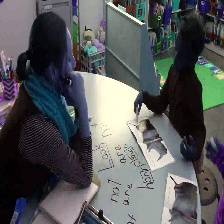

In [14]:
image = images[0]
bb = images[1]

# image = normalize_image(image)
idx = 4
print(label)
print(bb[idx])
image[idx]

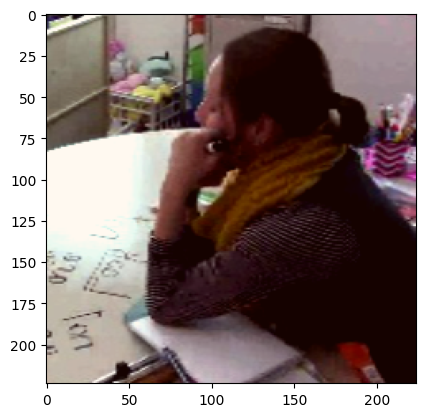

In [15]:
image = torch.stack([process_data[2 + 3*idx], process_data[1 + 3*idx], process_data[0 +3*idx]]).permute(1, 2, 0)

def normalize_image(image):
    image = (image/torch.max(image))
    image = (image - torch.min(image))
    image /= torch.max(image)
    return image

image = normalize_image(image)
plt.imshow(image)

In [ ]:
image.shape

torch.Size([224, 224, 3])

In [ ]:
process_data.shape

torch.Size([24, 224, 224])